In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import Image
from tensorflow.keras.datasets import mnist
import cv2 
import numpy as np
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('./input/digit-recognizer/train.csv')

In [3]:
y = df.label

In [5]:
df = df.drop('label', axis=1)
X = df.values.tolist()

In [6]:
y = np.array(y)
X = np.array(X)
X = X.reshape(-1, 28, 28)
X = np.array(X)

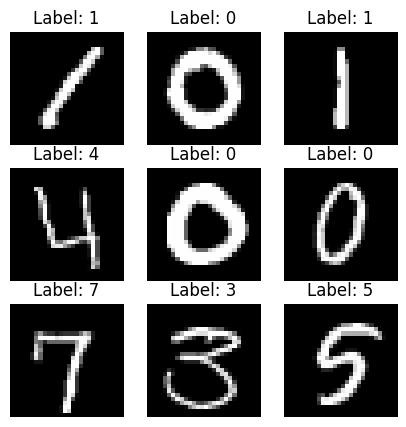

In [7]:
num_images_to_show = 9
plt.figure(figsize=(5, 5))
for i in range(num_images_to_show):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

In [8]:
np.shape(X)

(42000, 28, 28)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=104, test_size=0.2, shuffle=True)

In [10]:
np.shape(X_train)

(33600, 28, 28)

# Using Convolutional Neural Networks 

In [11]:
model_cnn = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

E:\ML\ML_Models\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),#Try other optimizers like  Adagrade , Gradient decent with momentum ,RMSprop for diff accu
    metrics=["accuracy"],
)

In [23]:
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

model_cnn.fit(X_train,y_train,batch_size=32,epochs=10,verbose=2,callbacks=[early_stopping])

Epoch 1/10
1050/1050 - 9s - 9ms/step - accuracy: 0.9254 - loss: 0.2430
Epoch 2/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9804 - loss: 0.0637
Epoch 3/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9862 - loss: 0.0443
Epoch 4/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9896 - loss: 0.0341
Epoch 5/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9912 - loss: 0.0259
Epoch 6/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9932 - loss: 0.0203
Epoch 7/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9945 - loss: 0.0160
Epoch 8/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9951 - loss: 0.0153
Epoch 9/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9964 - loss: 0.0119
Epoch 10/10
1050/1050 - 8s - 7ms/step - accuracy: 0.9960 - loss: 0.0123


In [24]:
model_cnn.evaluate(X_test, y_test, batch_size=32, verbose=2)

263/263 - 1s - 4ms/step - accuracy: 0.9905 - loss: 0.0417


[0.04165294021368027, 0.9904761910438538]

In [25]:
pred_cnn_arr = model_cnn.predict(X_test)
pred_cnn = np.argmax(pred_cnn_arr,axis = 1) 

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [26]:
print(f"The accuracy score is {accuracy_score(y_test, pred_cnn)*100}%")

The accuracy score is 99.04761904761905%


# Generate Submission csv

In [28]:
df1 = pd.read_csv('./input/digit-recognizer/test.csv')

In [29]:
X_sub = df1.values.tolist()

In [30]:
X_sub = np.array(X_sub)
X_sub = X_sub.reshape(-1, 28, 28)

In [31]:
model_cnn = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

E:\ML\ML_Models\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),#Try other optimizers like  Adagrade , Gradient decent with momentum ,RMSprop for diff accu
    metrics=["accuracy"],
)

In [33]:
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

model_cnn.fit(X ,y ,batch_size=32, epochs=10, verbose=2, callbacks=[early_stopping])

Epoch 1/10
1313/1313 - 11s - 8ms/step - accuracy: 0.9358 - loss: 0.2079
Epoch 2/10
1313/1313 - 9s - 7ms/step - accuracy: 0.9811 - loss: 0.0601
Epoch 3/10
1313/1313 - 9s - 7ms/step - accuracy: 0.9864 - loss: 0.0421
Epoch 4/10
1313/1313 - 9s - 7ms/step - accuracy: 0.9891 - loss: 0.0329
Epoch 5/10
1313/1313 - 9s - 7ms/step - accuracy: 0.9921 - loss: 0.0246
Epoch 6/10
1313/1313 - 9s - 7ms/step - accuracy: 0.9925 - loss: 0.0209
Epoch 7/10
1313/1313 - 10s - 7ms/step - accuracy: 0.9946 - loss: 0.0167
Epoch 8/10
1313/1313 - 10s - 8ms/step - accuracy: 0.9952 - loss: 0.0139
Epoch 9/10
1313/1313 - 10s - 7ms/step - accuracy: 0.9954 - loss: 0.0137
Epoch 10/10
1313/1313 - 10s - 7ms/step - accuracy: 0.9967 - loss: 0.0102


In [34]:
pred_cnn_arr = model_cnn.predict(X_sub)
pred_cnn = np.argmax(pred_cnn_arr,axis = 1) 

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [35]:
ans = []
for i in range(len(pred_cnn)):
    ans.append([i+1, pred_cnn[i]])

In [36]:
sub_csv = pd.DataFrame(ans, columns=['ImageId', 'Label'])

In [37]:
sub_csv.to_csv('./output/digit-recognizer/submission.csv', index=False)